<a href="https://colab.research.google.com/github/swethasrihari/privacy-project-team1/blob/main/privacy_project_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
path ='/content/drive/MyDrive/Colab Notebooks/Privacy_Project/adult.csv'

In [89]:
data = pd.read_csv(path)
print(data.head())
print(data.shape)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [90]:
# in this dataset, the cells with no values are represented as ?. Here we want to find how many missing values are in this dataset.
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [91]:
# data cleaning, removing the data with ? as their value
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]

data.shape

(45222, 15)

In [92]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [93]:
# frequency for categorical fields
category_col =['workclass', 'race', 'education','educational-num','marital-status', 'occupation',
               'relationship', 'gender', 'age', 'income','native-country']
for c in category_col:
    print (c)
    print (data[c].value_counts())

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
educational-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: ed

In [94]:
# here we can see that the income classes are not balanced.
print(data["income"].value_counts()[0] / data.shape[0])
print(data["income"].value_counts()[1] / data.shape[0])

0.7521560302507629
0.2478439697492371


In [95]:
# replace the Divorced, Never-married, Separated to not married and the rest to married
data.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,not married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,not married,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,not married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [96]:
import numpy as np
for col in category_col:
    b, c = np.unique(data[col], return_inverse=True)
    data[col] = c

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,226802,1,6,1,6,3,2,1,0,0,40,38,0
1,21,2,89814,11,8,0,4,0,4,1,0,0,50,38,0
2,11,1,336951,7,11,0,10,0,4,1,0,0,40,38,1
3,27,2,160323,15,9,0,6,0,2,1,7688,0,40,38,1
5,17,2,198693,0,5,1,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,2,257302,7,11,0,12,5,4,0,0,0,38,38,0
48838,23,2,154374,11,8,0,6,0,4,1,0,0,40,38,1
48839,41,2,151910,11,8,1,0,4,4,0,0,0,40,38,0
48840,5,2,201490,11,8,1,0,3,4,1,0,0,20,38,0


In [97]:
from scipy import stats

col_names = data.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "income":
        if len(data[c].unique()) <= 2:
            corr = stats.spearmanr(data['income'],data[c])[0]
        else:
            corr = stats.pointbiserialr(data['income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
marital-status,-0.437678,0.437678
educational-num,0.332800,0.332800
relationship,-0.253402,0.253402
age,0.237040,0.237040
hours-per-week,0.227199,0.227199
capital-gain,0.221034,0.221034
gender,0.215760,0.215760
capital-loss,0.148687,0.148687
education,0.081196,0.081196


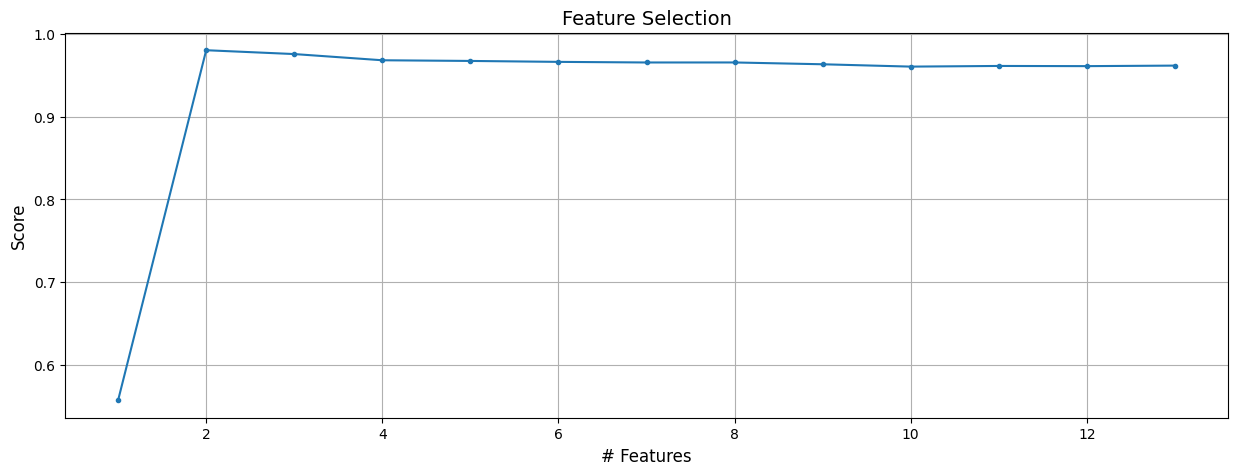

In [98]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
scoresCV = []
scores = []

for i in range(1,len(param_df)):
    new_df=data[param_df.index[0:i+1].values]
    X = new_df.iloc[:,1::]
    y = new_df.iloc[:,0]
    clf = DecisionTreeClassifier()
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))

plt.figure(figsize=(15,5))
plt.plot(range(1,len(scores)+1),scores, '.-')
plt.axis("tight")
plt.title('Feature Selection', fontsize=14)
plt.xlabel('# Features', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid();

In [99]:
predictors = ['workclass','education','educational-num','age',
              'marital-status', 'occupation','relationship','race','gender']
high_income = data[data['income'] == 1]
low_income = data[data['income'] == 0]
# stratified sampling
#80% to train set
train = pd.concat([high_income.sample(frac=0.8, random_state=1),
                   low_income.sample(frac=0.8, random_state=1)])
y_train = train["income"]
X_train = train[predictors]

#10% to test set
test = pd.concat([high_income.sample(frac=0.1, random_state=1),
                  low_income.sample(frac=0.1, random_state=1)])
y_test = test["income"]
X_test = test[predictors]

#10% to Cross Validation set
cross = pd.concat([high_income.sample(frac=0.1, random_state=2),
                   low_income.sample(frac=0.1, random_state=2)])
y_cross = cross["income"]
X_cross = cross[predictors]

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
y_pred = rf.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Random Forest Classification Report")
print(report)

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3401
           1       0.84      0.81      0.83      1121

    accuracy                           0.92      4522
   macro avg       0.89      0.88      0.89      4522
weighted avg       0.92      0.92      0.92      4522



In [103]:
k_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 5-Anonymized Distinct-2-Diverse.csv'
k_data = pd.read_csv(k_path)
k_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,31-60,White,Undergraduate,13-Oct,Spouse Present,Husband,Private,White-Collar,>50K
1,Female,31-60,White,Undergraduate,13-Oct,Spouse Present,Wife,Private,White-Collar,>50K
2,Female,31-60,White,High School,9-Apr,Spouse Present,Wife,Private,White-Collar,<=50K
3,Female,31-60,White,Undergraduate,13-Oct,Spouse Not Present,Unmarried,Private,White-Collar,<=50K
4,Female,0-30,White,Graduate,14-16,Spouse Not Present,Own-child,Private,Blue-Collar,<=50K


In [104]:
category_col =['workclass', 'race', 'education','educational-num','marital-status', 'occupation',
               'relationship', 'gender', 'age', 'income']

In [105]:
import numpy as np
for col in category_col:
    b, c = np.unique(k_data[col], return_inverse=True)
    k_data[col] = c

k_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,1,1,3,0,1,0,0,1,1
1,0,1,1,3,0,1,5,0,1,1
2,0,1,1,2,3,1,5,0,1,0
3,0,1,1,3,0,0,4,0,1,0
4,0,0,1,1,1,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41046,1,1,1,2,3,1,0,0,0,1
41047,1,1,0,2,3,0,1,0,0,0
41048,1,1,1,2,3,1,0,0,0,1
41049,1,1,0,2,3,0,1,0,0,0


In [106]:
k_X_test = k_data[predictors]
k_y_test = k_data["income"]
k_y_pred = rf.predict(k_X_test)

In [107]:
k_report = classification_report(k_y_test, k_y_pred)
print("Random Forest K-Annonymity5 Classification Report")
print(k_report)

Random Forest K-Annonymity5 Classification Report
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     29961
           1       0.00      0.00      0.00     11090

    accuracy                           0.73     41051
   macro avg       0.36      0.50      0.42     41051
weighted avg       0.53      0.73      0.62     41051



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
k10_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 10-Anonymized Distinct-2-Diverse.csv'
k10_data = pd.read_csv(k10_path)
k10_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,31-60,Non-White,High School,4-9,Spouse Not Present,Not-in-family,Private,Blue-Collar,<=50K
1,Male,61-90,White,Undergraduate,10-13,Spouse Present,Husband,Private,White-Collar,>50K
2,Male,31-60,White,High School,4-9,Spouse Present,Husband,Private,Blue-Collar,<=50K
3,Female,31-60,White,Undergraduate,10-13,Spouse Not Present,Not-in-family,Private,Blue-Collar,<=50K
4,Female,0-30,White,Undergraduate,10-13,Spouse Not Present,Not-in-family,Private,Blue-Collar,<=50K


In [109]:
for col in category_col:
    b, c = np.unique(k10_data[col], return_inverse=True)
    k10_data[col] = c

k10_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,1,0,2,3,0,1,0,0,0
1,1,2,1,3,1,1,0,0,1,1
2,1,1,1,2,3,1,0,0,0,0
3,0,1,1,3,1,0,1,0,0,0
4,0,0,1,3,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
40693,1,1,1,3,1,1,0,0,0,1
40694,1,1,1,3,1,1,0,0,1,1
40695,0,1,1,3,1,0,1,0,1,0
40696,1,0,1,2,3,0,3,0,0,0


In [110]:
k10_X_test = k10_data[predictors]
k10_y_test = k10_data["income"]
k10_y_pred = rf.predict(k10_X_test)

In [111]:
k10_report = classification_report(k10_y_test, k10_y_pred)
print("Random Forest for DP K-Annonymity10 Classification Report")
print(k10_report)

Random Forest for DP K-Annonymity10 Classification Report
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     29712
           1       0.00      0.00      0.00     10986

    accuracy                           0.73     40698
   macro avg       0.37      0.50      0.42     40698
weighted avg       0.53      0.73      0.62     40698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
k20_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 20-Anonymized Distinct-2-Diverse.csv'
k20_data = pd.read_csv(k20_path)
k20_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,31-60,White,Undergraduate,13-Oct,Spouse Present,Husband,Private,Blue-Collar,>50K
1,Female,31-60,White,Undergraduate,13-Oct,Spouse Not Present,Unmarried,Public,Blue-Collar,<=50K
2,Female,0-30,White,Undergraduate,13-Oct,Spouse Not Present,Other-relative,Private,White-Collar,<=50K
3,Male,61-90,White,High School,9-Apr,Spouse Present,Husband,Private,White-Collar,>50K
4,Male,0-30,White,Undergraduate,13-Oct,Spouse Present,Husband,Private,Blue-Collar,<=50K


In [113]:
for col in category_col:
    b, c = np.unique(k20_data[col], return_inverse=True)
    k20_data[col] = c

k20_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,1,1,3,0,1,0,0,0,1
1,0,1,1,3,0,0,4,1,0,0
2,0,0,1,3,0,0,2,0,1,0
3,1,2,1,2,3,1,0,0,1,1
4,1,0,1,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
39990,0,0,1,2,3,0,1,0,1,0
39991,1,1,1,3,0,1,0,0,1,1
39992,1,0,0,2,3,0,3,0,0,0
39993,1,1,1,2,3,1,0,0,0,0


In [114]:
k20_X_test = k20_data[predictors]
k20_y_test = k20_data["income"]
k20_y_pred = rf.predict(k20_X_test)

In [115]:
k20_report = classification_report(k20_y_test, k20_y_pred)
print("Random Forest for DP K-Annonymity20 Classification Report")
print(k20_report)

Random Forest for DP K-Annonymity20 Classification Report
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     29205
           1       0.00      0.00      0.00     10790

    accuracy                           0.73     39995
   macro avg       0.37      0.50      0.42     39995
weighted avg       0.53      0.73      0.62     39995



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
dpPoint5_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income .5-Epsilon Differential.csv'
dpPoint5_data = pd.read_csv(dpPoint5_path)
dpPoint5_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Female,*,White,No Higher Education,1-9,Spouse Not Present,Not In Family,Public,*,<=50K
1,Female,*,White,Higher Education,10-16,Spouse Not Present,Not In Family,Private,*,<=50K
2,Female,*,White,Higher Education,10-16,Spouse Not Present,In Family,Private,*,<=50K
3,Female,*,Non-White,No Higher Education,1-9,Spouse Not Present,In Family,Private,*,<=50K
4,Male,*,White,No Higher Education,1-9,Spouse Present,In Family,Private,*,<=50K


In [117]:
for col in category_col:
    b, c = np.unique(dpPoint5_data[col], return_inverse=True)
    dpPoint5_data[col] = c

dpPoint5_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,0,0,1,1,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15280,1,0,1,1,0,1,0,0,0,0
15281,1,0,0,1,0,0,1,0,0,0
15282,1,0,1,1,0,0,0,0,0,0
15283,0,0,1,0,1,0,1,0,0,0


In [118]:
dpPoint5_X_test = dpPoint5_data[predictors]
dpPoint5_y_test = dpPoint5_data["income"]
dpPoint5_y_pred = rf.predict(dpPoint5_X_test)

In [119]:
dpPoint5_report = classification_report(dpPoint5_y_test, dpPoint5_y_pred)
print("Random Forest for DP epsilon- 0.5 Classification Report")
print(dpPoint5_report)

Random Forest for DP epsilon- 0.5 Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11730
           1       0.00      0.00      0.00      3555

    accuracy                           0.77     15285
   macro avg       0.38      0.50      0.43     15285
weighted avg       0.59      0.77      0.67     15285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
dp1_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 1-Epsilon Differential.csv'
dp1_data = pd.read_csv(dp1_path)
dp1_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Female,31-60,White,No Higher Education,*,Spouse Not Present,Not In Family,*,Blue-Collar,<=50K
1,Female,61-90,White,No Higher Education,*,Spouse Not Present,Not In Family,*,White-Collar,<=50K
2,Female,31-60,White,No Higher Education,*,Spouse Not Present,Not In Family,*,Blue-Collar,<=50K
3,Male,31-60,White,Higher Education,*,Spouse Not Present,Not In Family,*,White-Collar,>50K
4,Male,31-60,White,Higher Education,*,Spouse Present,In Family,*,White-Collar,<=50K


In [121]:
for col in category_col:
    b, c = np.unique(dp1_data[col], return_inverse=True)
    dp1_data[col] = c

dp1_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,0,1,1,1,0,0,1,0,0,0
1,0,2,1,1,0,0,1,0,1,0
2,0,1,1,1,0,0,1,0,0,0
3,1,1,1,0,0,0,1,0,1,1
4,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
23929,0,0,1,0,0,0,1,0,0,0
23930,1,1,1,1,0,0,1,0,0,0
23931,1,0,1,1,0,0,0,0,1,0
23932,1,1,1,1,0,1,0,0,0,0


In [122]:
dp1_X_test = dp1_data[predictors]
dp1_y_test = dp1_data["income"]
dp1_y_pred = rf.predict(dp1_X_test)

In [123]:
dp1_report = classification_report(dp1_y_test, dp1_y_pred)
print("Random Forest for DP epsilon-1 Classification Report")
print(dp1_report)

Random Forest for DP epsilon-1 Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     18180
           1       0.00      0.00      0.00      5754

    accuracy                           0.76     23934
   macro avg       0.38      0.50      0.43     23934
weighted avg       0.58      0.76      0.66     23934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
dp2_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 2-Epsilon Differential.csv'
dp2_data = pd.read_csv(dp2_path)
dp2_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,*,*,No Higher Education,1-9,Spouse Present,Husband,Private,Blue-Collar,<=50K
1,Male,*,*,No Higher Education,1-9,Spouse Present,Husband,Private,White-Collar,<=50K
2,Female,*,*,No Higher Education,1-9,Spouse Not Present,Not-in-family,Private,Blue-Collar,<=50K
3,Female,*,*,No Higher Education,1-9,Spouse Not Present,Not-in-family,Private,Blue-Collar,<=50K
4,Male,*,*,Higher Education,10-16,Spouse Not Present,Own-child,Private,White-Collar,<=50K


In [125]:
for col in category_col:
    b, c = np.unique(dp2_data[col], return_inverse=True)
    dp2_data[col] = c

dp2_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,0,0,1,0,1,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
34206,0,0,0,0,1,0,1,1,1,0
34207,1,0,0,1,0,1,0,0,0,0
34208,1,0,0,1,0,1,0,0,1,0
34209,1,0,0,1,0,1,0,1,0,0


In [126]:
dp2_X_test = dp2_data[predictors]
dp2_y_test = dp2_data["income"]
dp2_y_pred = rf.predict(dp2_X_test)

In [127]:
dp2_report = classification_report(dp2_y_test, dp2_y_pred)
print("Random Forest for DP epsilon-2 Classification Report")
print(dp2_report)

Random Forest for DP epsilon-2 Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     26115
           1       0.00      0.00      0.00      8096

    accuracy                           0.76     34211
   macro avg       0.38      0.50      0.43     34211
weighted avg       0.58      0.76      0.66     34211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
dp4_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 4-Epsilon Differential.csv'
dp4_data = pd.read_csv(dp4_path)
dp4_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,*,White,No Higher Education,1-9,Spouse Not Present,Not In Family,Private,*,<=50K
1,Male,*,White,No Higher Education,1-9,Spouse Not Present,In Family,Private,*,<=50K
2,Male,*,White,Higher Education,10-16,Spouse Not Present,In Family,Private,*,<=50K
3,Female,*,White,No Higher Education,1-9,Spouse Not Present,In Family,Private,*,<=50K
4,Female,*,White,Higher Education,10-16,Spouse Not Present,Not In Family,Private,*,<=50K


In [129]:
for col in category_col:
    b, c = np.unique(dp4_data[col], return_inverse=True)
    dp4_data[col] = c

dp4_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,0,1,1,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35413,1,0,1,1,0,1,0,0,0,1
35414,1,0,1,0,1,0,0,0,0,0
35415,1,0,1,1,0,1,0,0,0,0
35416,1,0,1,1,0,0,0,0,0,0


In [130]:
dp4_X_test = dp4_data[predictors]
dp4_y_test = dp4_data["income"]
dp4_y_pred = rf.predict(dp4_X_test)

In [131]:
dp4_report = classification_report(dp4_y_test, dp4_y_pred)
print("Random Forest for DP epsilon-4 Classification Report")
print(dp4_report)

Random Forest for DP epsilon-4 Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     26913
           1       0.00      0.00      0.00      8505

    accuracy                           0.76     35418
   macro avg       0.38      0.50      0.43     35418
weighted avg       0.58      0.76      0.66     35418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


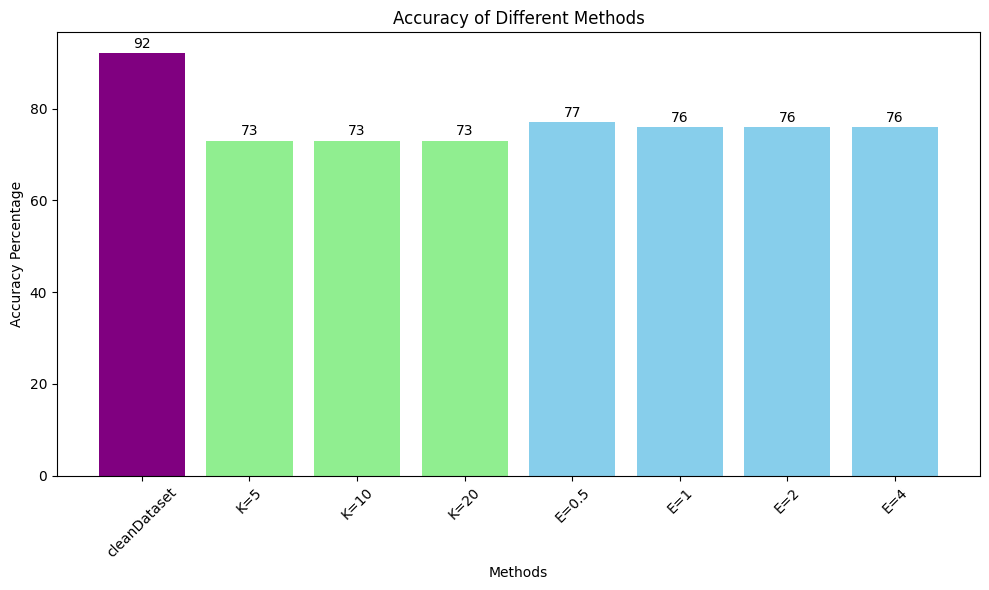

In [174]:
import matplotlib.pyplot as plt

# Data
x_values = ['cleanDataset', 'K=5', 'K=10', 'K=20', 'E=0.5', 'E=1', 'E=2', 'E=4']
y_values = [92, 73, 73, 73, 77, 76, 76, 76]
colors = ['purple', 'lightgreen', 'lightgreen', 'lightgreen', 'skyblue', 'skyblue', 'skyblue', 'skyblue']  # Colors for each bar
legend_labels = ['clean Dataset', 'k_Anonymity', 'Differential Privacy']  # Labels for the legend


# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars=plt.bar(x_values, y_values,color=colors)


# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy Percentage')
plt.title('Accuracy of Different Methods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Adding y-value labels on top of each bar
for bar, value in zip(bars, y_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(value), ha='center', va='bottom')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
